In [1]:
import pandas as pd
import openpyxl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 패치
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
df_18 = pd.read_excel('18_공실률.xls')

In [3]:
df_19 = pd.read_excel('19_공실률.xls')

In [4]:
df_18 = df_18[['하위상권', '공실률']]

In [5]:
df_19 = df_19[['하위상권', '공실률']]

In [6]:
df_18 = df_18.drop(df_18.index[0])

In [7]:
df_19 = df_19.drop(df_19.index[0])

In [8]:
coB = pd.merge(df_18, df_19, on="하위상권")
coB

,하위상권,공실률_x,공실률_y
0,서울,11.4,9.1
1,소계,14.5,10.4
2,소계,14.5,7.4
3,소계,14.5,10.5
4,소계,14.5,11.5
5,소계,8.4,10.4
6,소계,8.4,7.4
7,소계,8.4,10.5
8,소계,8.4,11.5
9,소계,11.3,10.4


In [9]:
# 서울 지역만 남기고 날림
coB = coB.drop(coB.index[:17])

In [10]:
coB['평균'] = coB.iloc[:, 1:3].mean(axis=1)

In [11]:
coB = coB.reset_index()

In [12]:
coB = coB.drop('index', 1)

C:\Users\82103\AppData\Local\Temp/ipykernel_15328/528844221.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coB = coB.drop('index', 1)


In [13]:
# ...없애기
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [16]:
coB.columns

Index(['하위상권', '공실률_x', '공실률_y', '평균'], dtype='object')

In [17]:
coB.columns = ['지역', '2018 공실률', '2019공실률', '평균']

<Figure size 1080x720 with 0 Axes>

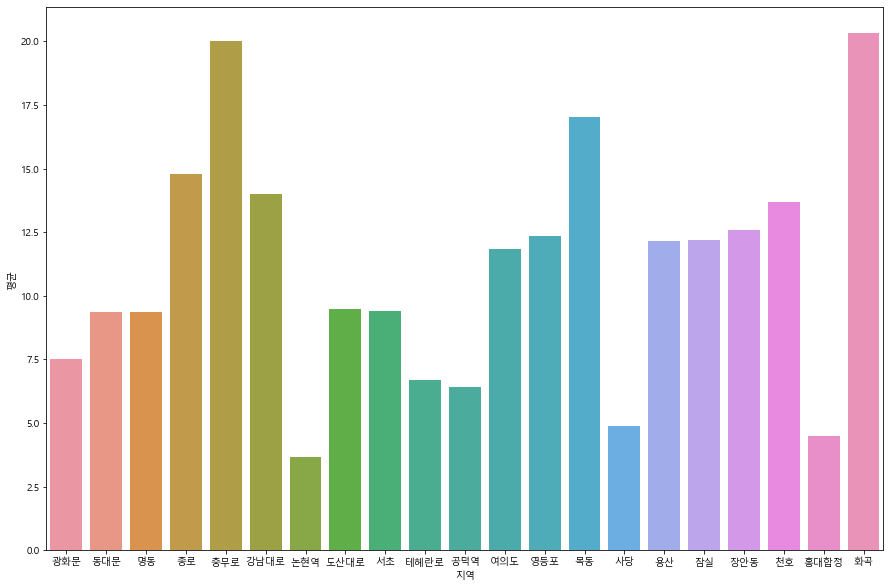

In [18]:
plt.figure(figsize=(15,10))

splot = sns.barplot(data=coB, x='지역', y='평균')


plt.show()
sfig = splot.get_figure()
sfig.savefig('2018-19_empty.png')

In [19]:
coB.to_csv('2018-19 공실률.csv')